# Textmining - wired

---

Group name: Group B

---


## Setup

In [99]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

In [100]:
# we suppress some unimportant warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Data
### Data import

In [101]:
import pandas as pd

In [102]:
# import articles and save as data frame
df = pd.read_csv("../data/raw/webscraping.csv", sep="|")

### Data corrections

In [103]:
df['article'] = df['article'].astype(str).str.lower()

In [104]:
df

,Unnamed: 0,website,article
0,0,five,...
1,1,wired,skip to main content open navigation menu to r...


# 1 | Text mining
## Data preparation

In [105]:
from nltk.tokenize import RegexpTokenizer

In [106]:
regexp = RegexpTokenizer('\w+')
df['article_token']=df['article'].apply(regexp.tokenize)

In [107]:
df.head()

,Unnamed: 0,website,article,article_token
0,0,five,...,"[skip, to, main, content, fivethirtyeight, sea..."
1,1,wired,skip to main content open navigation menu to r...,"[skip, to, main, content, open, navigation, me..."


### Stopwords

In [108]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
import nltk
from nltk.corpus import stopwords

In [110]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [111]:
# make your own custom stopwords
my_stopwords = ['https', 'co']

In [112]:
# Extend the stopword list with your own custom stopwords
stopwords.extend(my_stopwords)

In [113]:
df['article_token_s'] = df['article_token'].apply(lambda x: [i for i in x if i not in stopwords])

In [114]:
df.head(3)

,Unnamed: 0,website,article,article_token,article_token_s
0,0,five,...,"[skip, to, main, content, fivethirtyeight, sea...","[skip, main, content, fivethirtyeight, search,..."
1,1,wired,skip to main content open navigation menu to r...,"[skip, to, main, content, open, navigation, me...","[skip, main, content, open, navigation, menu, ..."


### Transform data and remove infrequent words

In [115]:
df['article_si'] = df['article_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

In [116]:
df

,Unnamed: 0,website,article,article_token,article_token_s,article_si
0,0,five,...,"[skip, to, main, content, fivethirtyeight, sea...","[skip, main, content, fivethirtyeight, search,...",skip main content fivethirtyeight search searc...
1,1,wired,skip to main content open navigation menu to r...,"[skip, to, main, content, open, navigation, me...","[skip, main, content, open, navigation, menu, ...",skip main content open navigation menu revist ...


### Lemmatization

In [117]:
# we need to download some packages
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [118]:
from nltk.stem import WordNetLemmatizer

In [119]:
# create an object called wordnet_lem of the WordNetLemmatizer() function.
wordnet_lem = WordNetLemmatizer()

In [120]:
# create a new column (l for lemmatization) and apply the function .lemmatize
df['article_sil'] = df['article_si'].apply(wordnet_lem.lemmatize)

In [121]:
# we check wether there are any differences in the two columns
check_difference = (df['article_sil'] == df['article_si'])

# sum all True and False values
check_difference.value_counts()

True    2
dtype: int64

In [122]:
df

,Unnamed: 0,website,article,article_token,article_token_s,article_si,article_sil
0,0,five,...,"[skip, to, main, content, fivethirtyeight, sea...","[skip, main, content, fivethirtyeight, search,...",skip main content fivethirtyeight search searc...,skip main content fivethirtyeight search searc...
1,1,wired,skip to main content open navigation menu to r...,"[skip, to, main, content, open, navigation, me...","[skip, main, content, open, navigation, menu, ...",skip main content open navigation menu revist ...,skip main content open navigation menu revist ...


In [123]:
# only wired article
df_wired = df.iloc[1]
df_wired

Unnamed: 0                                                         1
website                                                        wired
article            skip to main content open navigation menu to r...
article_token      [skip, to, main, content, open, navigation, me...
article_token_s    [skip, main, content, open, navigation, menu, ...
article_si         skip main content open navigation menu revist ...
article_sil        skip main content open navigation menu revist ...
Name: 1, dtype: object

## Data visualization

In [124]:
all_words = df_wired['article_sil']

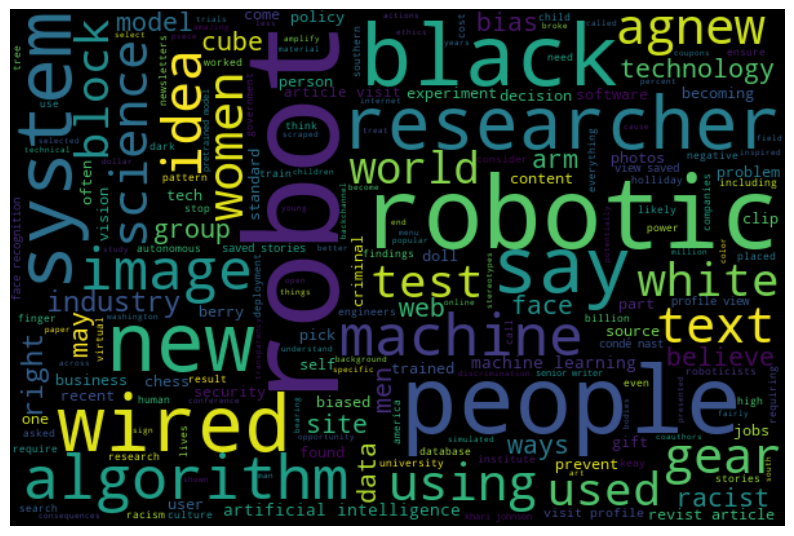

In [125]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

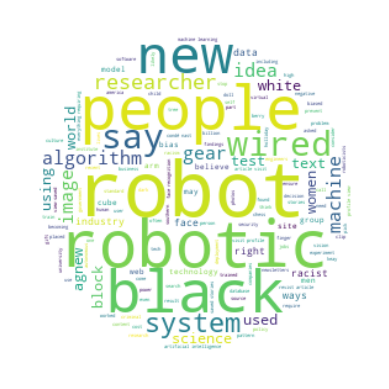

In [126]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [127]:
# download the package
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [128]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [129]:
# tokenize the words
words_tokens = nltk.word_tokenize(all_words)

In [130]:
# use the function FreqDist and save the result as fd
fd = FreqDist(words_tokens)

In [131]:
fd

FreqDist({'robot': 17, 'robots': 16, 'people': 16, 'robotics': 15, 'black': 13, 'new': 12, 'wired': 11, 'researchers': 9, 'says': 9, 'algorithms': 8, ...})

### Most common words

In [132]:
# find the 3 most common words
top_3 = fd.most_common(n=3)

top_3

[('robot', 17), ('robots', 16), ('people', 16)]

In [133]:
# show the 3 most common words as table
fd.tabulate(3)

 robot robots people 
    17     16     16 


### Plot common words

In [134]:
# Obtain top 10 words
top_10 = fd.most_common(10)

top_10

[('robot', 17),
 ('robots', 16),
 ('people', 16),
 ('robotics', 15),
 ('black', 13),
 ('new', 12),
 ('wired', 11),
 ('researchers', 9),
 ('says', 9),
 ('algorithms', 8)]

In [135]:
# make a pandas datframe from the dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
algorithms,8
black,13
new,12
people,16
researchers,9
robot,17
robotics,15
robots,16
says,9
wired,11


In [136]:
# reset index to transform index to column
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,algorithms,8
1,black,13
2,new,12
3,people,16
4,researchers,9
5,robot,17
6,robotics,15
7,robots,16
8,says,9
9,wired,11


In [137]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

### Search specific words

In [138]:
# Show frequency of a specific word
fd["election"]

0

# 2 | Sentiment analysis

In [139]:
import nltk

# we suppress some unimportant warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Analysis

In [140]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [141]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [142]:
# polarity score
df['polarity'] = df['article_sil'].apply(lambda x: analyzer.polarity_scores(x))

In [143]:
# Change data structure (we unnest the column polarity and add new columns)
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)

In [144]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x == 0 else 'negative')

In [145]:
df_wired = df.iloc[1]
df_wired

Unnamed: 0                                                         1
website                                                        wired
article            skip to main content open navigation menu to r...
article_token      [skip, to, main, content, open, navigation, me...
article_token_s    [skip, main, content, open, navigation, menu, ...
article_si         skip main content open navigation menu revist ...
article_sil        skip main content open navigation menu revist ...
neg                                                            0.105
neu                                                            0.761
pos                                                            0.134
compound                                                      0.9894
sentiment                                                   positive
Name: 1, dtype: object

In [146]:
print("The wired article has a compound of {}. The overall sentiment is {}".format(df_wired["compound"], df_wired["sentiment"]))

The wired article has a compound of 0.9894. The overall sentiment is positive


# Saving data frame as csv file

In [147]:
df_wired.to_csv("../data/processed/textmining-clean-WIRED.csv", index=None)